<a href="https://colab.research.google.com/github/gslopes-1996/Campaign-Prediction/blob/main/projeto_versao_demetrio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas e conjunto de dados ##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
#colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/ML1/ml_project1_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# data.info()

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

Dataset de 2014

## Início Análise Exploratória ##

#### Análise Exploratória e Data Prep variáveis não qualitativas


In [ ]:
data.loc[((data['AcceptedCmp1']== 1) | (data['AcceptedCmp2']== 1) | (data['AcceptedCmp3']== 1) | (data['AcceptedCmp4']== 1) | (data['AcceptedCmp5']== 1)) , 'Aceitou_alguma_campanha'] = 1
data.loc[((data['AcceptedCmp1']!= 1) & (data['AcceptedCmp2']!= 1) & (data['AcceptedCmp3']!= 1) & (data['AcceptedCmp4']!= 1) & (data['AcceptedCmp5']!= 1)) , 'Aceitou_alguma_campanha'] = 0
data.drop(columns= ['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], inplace = True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0


In [ ]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
data.loc[((data['Education']=="2n Cycle") | (data['Education']=="Basic")) , 'Educ_Basica'] = 1
data.loc[((data['Education']!="2n Cycle") & (data['Education']!="Basic")) , 'Educ_Basica'] = 0

data.loc[(data['Education']=="Graduation") , 'Ensino_Superior'] = 1
data.loc[(data['Education']!="Graduation") , 'Ensino_Superior'] = 0

data.loc[((data['Education']=="PhD") | (data['Education']=="Master")) , 'Pos_Graduacao'] = 1
data.loc[((data['Education']!="PhD") & (data['Education']!="Master")) , 'Pos_Graduacao'] = 0

data.drop(columns= ['Education'], inplace = True)
data.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao
0,1957,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0
1,1954,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0
2,1965,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0
3,1984,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0
4,1981,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0


In [ ]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
data.loc[((data['Marital_Status']=="Single") | (data['Marital_Status']=="Alone") | (data['Marital_Status']=="Absurd") | (data['Marital_Status']=="YOLO")) , 'Solteiro'] = 1
data.loc[((data['Marital_Status']!="Single") & (data['Marital_Status']!="Alone") & (data['Marital_Status']!="Absurd") & (data['Marital_Status']!="YOLO")) , 'Solteiro']  = 0

data.loc[((data['Marital_Status']=="Married") | (data['Marital_Status']=="Together")) , 'Casal'] = 1
data.loc[((data['Marital_Status']!="Married") & (data['Marital_Status']!="Together")) , 'Casal'] = 0

data.loc[((data['Marital_Status']=="Divorced") | (data['Marital_Status']=="Widow")) , 'Ex_Casal'] = 1
data.loc[((data['Marital_Status']!="Divorced") & (data['Marital_Status']!="Widow")) , 'Ex_Casal'] = 0

data.drop(columns= ['Marital_Status'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
data['Fidelizacao_anos'] = 2014 - pd.to_datetime(data['Dt_Customer']).dt.year

data.drop(columns= ['Dt_Customer'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


#### Análise Exploratória e Data Prep variáveis qualitativas


In [ ]:
data['Z_CostContact'].value_counts()

Z_CostContact
3    2240
Name: count, dtype: int64

In [ ]:
data['Z_Revenue'].value_counts()

Z_Revenue
11    2240
Name: count, dtype: int64

In [ ]:
data.drop(columns= ['Z_CostContact','Z_Revenue'], inplace = True)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

Verificando valores absurdos de idade

In [ ]:
valor_minimo = min( 2014 - data['Year_Birth'])
valor_maximo = max( 2014 - data['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo} anos e o(a) cliente mais velho(a) tem {valor_maximo} anos.")


O(a) cliente mais novo tem 18 anos e o(a) cliente mais velho(a) tem 121 anos.


Verificando quais clientes têm mais de 100 anos de idade

In [ ]:
data['Idade'] = 2014 - data['Year_Birth']

# Filtrar clientes com mais de 100 anos
pessoas_mais_de_100 = data[data['Idade'] > 100]

# Exibir as informações desses clientes
print(pessoas_mais_de_100[['Idade', 'Income']])

     Idade   Income
192    114  36640.0
239    121  60182.0
339    115  83532.0


Excluindo linhas de clientes com mais de 100 anos de idade

In [ ]:
data_cleaned = data[data['Idade'] <= 100]
valor_minimo_cleaned = min( 2014 - data_cleaned['Year_Birth'])
valor_maximo_cleaned = max( 2014 - data_cleaned['Year_Birth'])
print(f"O(a) cliente mais novo tem {valor_minimo_cleaned} anos e o(a) cliente mais velho(a) tem {valor_maximo_cleaned} anos.")


O(a) cliente mais novo tem 18 anos e o(a) cliente mais velho(a) tem 74 anos.


In [ ]:
data_cleaned.drop(columns= ['Year_Birth'], inplace = True)
data_cleaned.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


Verificando dados faltantes

In [ ]:
# Verificação de dados faltantes
missing_data = data_cleaned.isnull().sum()
colunas_com_faltantes = missing_data[missing_data > 0]
print(f"A(s) coluna(s) com dados faltantes é(são): {colunas_com_faltantes}")

A(s) coluna(s) com dados faltantes é(são): Income    24
dtype: int64


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2213 non-null   float64
 1   Kidhome                  2237 non-null   int64  
 2   Teenhome                 2237 non-null   int64  
 3   Recency                  2237 non-null   int64  
 4   MntWines                 2237 non-null   int64  
 5   MntFruits                2237 non-null   int64  
 6   MntMeatProducts          2237 non-null   int64  
 7   MntFishProducts          2237 non-null   int64  
 8   MntSweetProducts         2237 non-null   int64  
 9   MntGoldProds             2237 non-null   int64  
 10  NumDealsPurchases        2237 non-null   int64  
 11  NumWebPurchases          2237 non-null   int64  
 12  NumCatalogPurchases      2237 non-null   int64  
 13  NumStorePurchases        2237 non-null   int64  
 14  NumWebVisitsMonth        2237

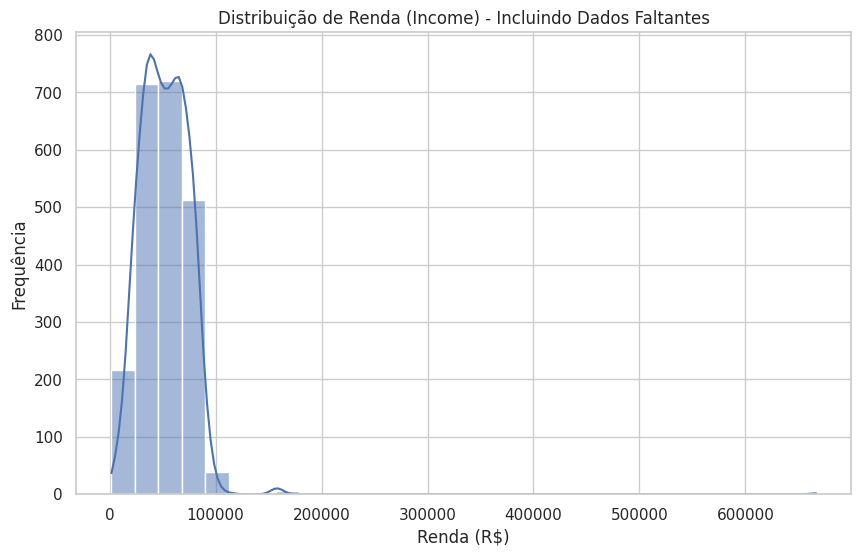

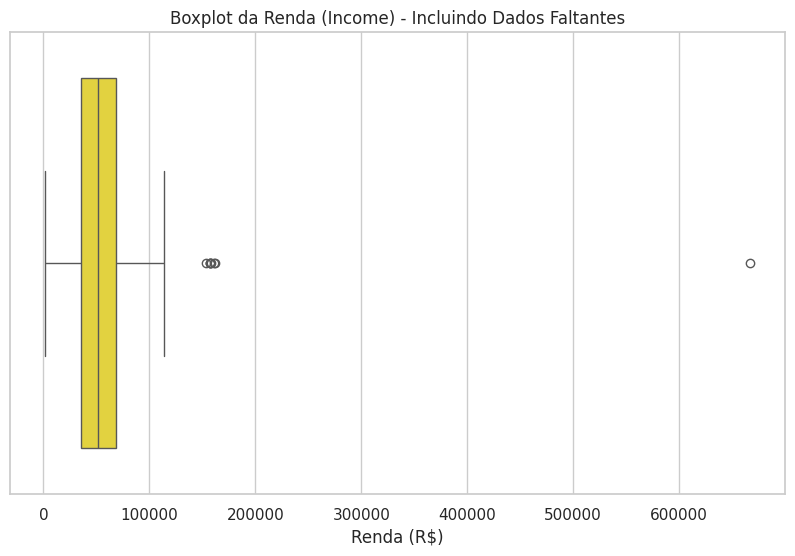

Algumas estatísticas da coluna 'Income': 
count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64


In [ ]:
# Análise de Distribuição para 'Income' incluindo valores faltantes

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Income'], bins=30, kde=True, palette=colors)
plt.title('Distribuição de Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Income'], palette=colors)
plt.title('Boxplot da Renda (Income) - Incluindo Dados Faltantes')
plt.xlabel('Renda (R$)')
plt.show()

# Estatísticas Descritivas
income_statistics = data_cleaned['Income'].describe()
print("Algumas estatísticas da coluna 'Income': ")
print(income_statistics)

Como a distribuição dos dados da coluna 'Income' é aproximadamente normal, vamos substituir os dados faltantes usando a mediana dos outros dados

In [ ]:
# Calculando a mediana da coluna 'Income'
mediana_income = data_cleaned['Income'].median()

# Substituindo os valores faltantes em 'Income' pela mediana
data_cleaned['Income'].fillna(mediana_income, inplace=True)

# Verificando se ainda existem valores faltantes em 'Income'
print(f"Valores faltantes em 'Income' após a imputação: {data_cleaned['Income'].isnull().sum()}")


Valores faltantes em 'Income' após a imputação: 0


In [ ]:
data['Kidhome'].value_counts()

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [ ]:
data_cleaned = data_cleaned.rename(
                columns={'Income': 'Renda', 'Kidhome': 'Num_criancas', 'Teenhome': 'Num_adolesc', 'Recency': 'Dias_desde_ult_compr' ,
                         'MntWines': 'Gasto_vinhos', 'MntFruits': 'Gasto_frutas', 'MntMeatProducts': 'Gasto_carnes', 'MntFishProducts': 'Gasto_peixe',
                        'MntSweetProducts': 'Gasto_doces', 'MntGoldProds': 'Gasto_luxo', 'NumDealsPurchases': 'Num_compras_promocao', 'NumWebPurchases': 'Num_compras_site',
                        'NumCatalogPurchases': 'Num_compras_catalogo', 'NumStorePurchases': 'Num_compras_loja', 'NumWebVisitsMonth': 'Num_vis_site_ult_mes',
                        'Complain': 'Reclamou',
                        })
data_cleaned.head()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Response,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,33


## Análise do Perfil de Cliente ##

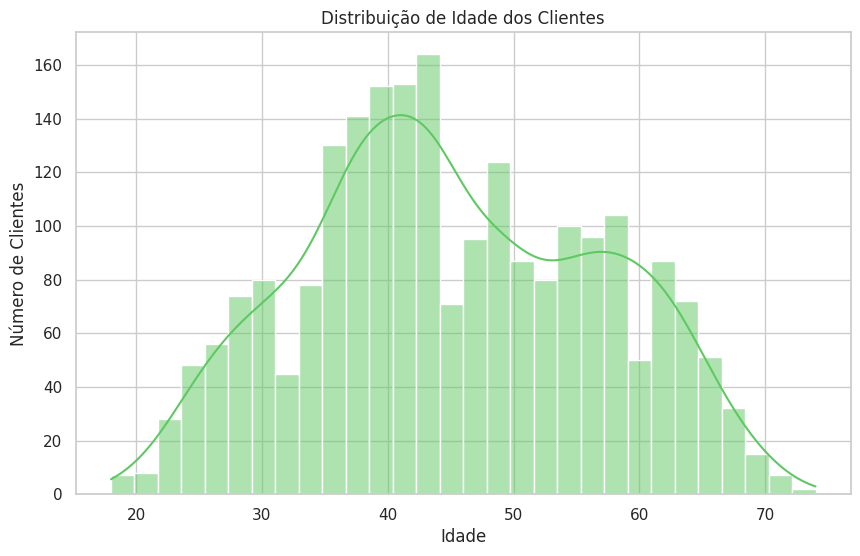

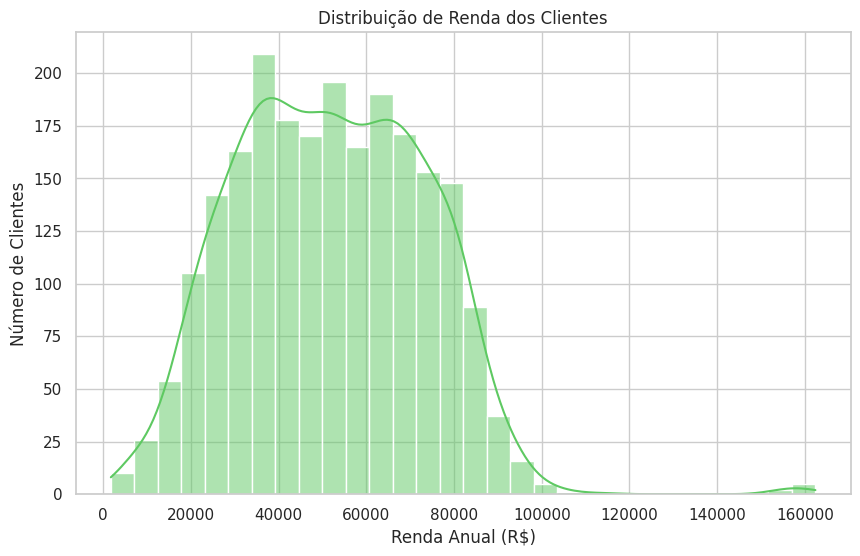

In [ ]:
# Início das análises

# Plotando a distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Idade'], bins=30, kde=True, color=colors[1])
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.show()

# Plotando a distribuição de renda
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned[data_cleaned['Renda'] < 200000]['Renda'], bins=30, kde=True, color=colors[1])  # Filtrando valores extremamente altos para melhor visualização
plt.title('Distribuição de Renda dos Clientes')
plt.xlabel('Renda Anual (R$)')
plt.ylabel('Número de Clientes')
plt.show()

# # Contagem de clientes por nível de educação
# plt.figure(figsize=(10, 6))
# sns.countplot(data=data_cleaned, x='Education', order=data_cleaned['Education'].value_counts().index, palette=colors)
# plt.title('Nível de Educação dos Clientes')
# plt.xlabel('Educação')
# plt.ylabel('Número de Clientes')
# plt.xticks(rotation=45)
# plt.show()

# # Contagem de clientes por estado civil
# plt.figure(figsize=(10, 6))
# sns.countplot(data=data_cleaned, x='Marital_Status', order = data_cleaned['Marital_Status'].value_counts().index, palette=colors )
# plt.title('Estado Civil dos Clientes')
# plt.xlabel('Estado Civil')
# plt.ylabel('Número de Clientes')
# plt.xticks(rotation=45)
# plt.show()

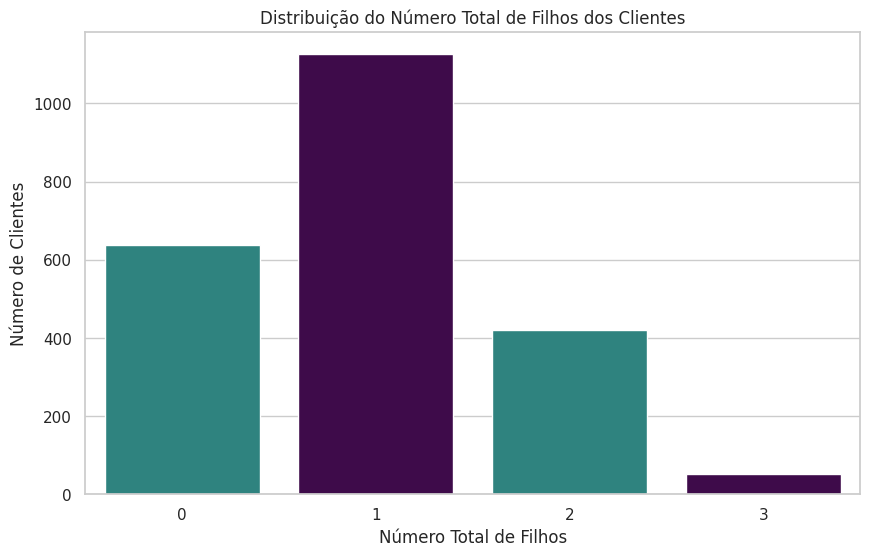

In [ ]:
colors2 = ['#21918c', '#440154']

# Plotando a distribuição do número total de filhos
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x=data_cleaned['Num_criancas'] + data_cleaned['Num_adolesc'], palette=colors2)
plt.title('Distribuição do Número Total de Filhos dos Clientes')
plt.xlabel('Número Total de Filhos')
plt.ylabel('Número de Clientes')
plt.show()

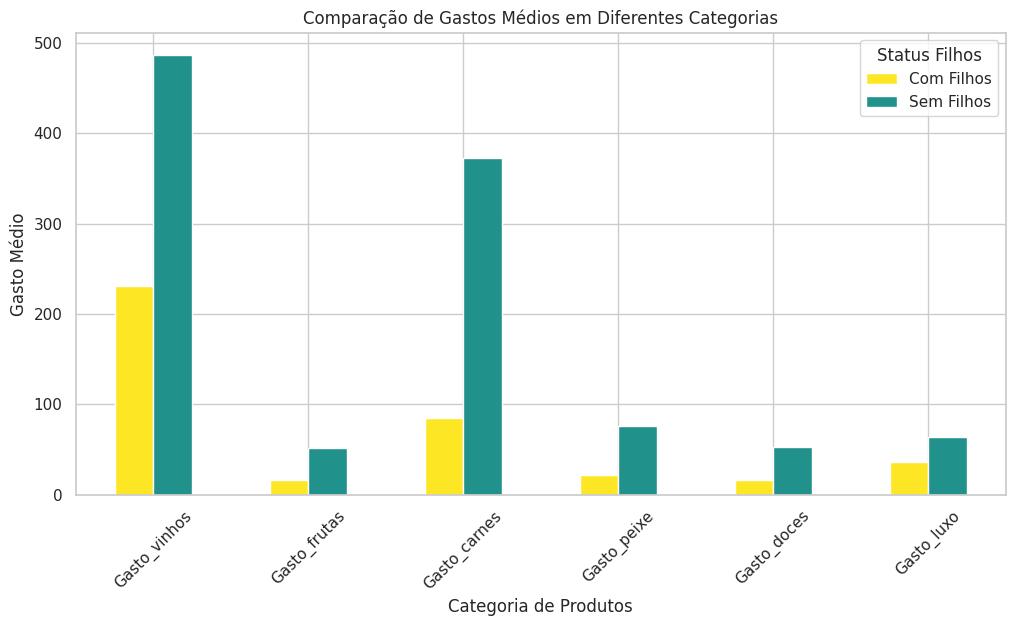

In [ ]:
# Criando a coluna 'Status Filhos'
data_cleaned['Status_Filhos'] = data_cleaned.apply(lambda row: 'Com Filhos' if row['Num_criancas'] > 0 or row['Num_adolesc'] > 0 else 'Sem Filhos', axis=1)

colors2 = ['#fde725', '#21918c']

# Lista de categorias de produtos
categorias = ['Gasto_vinhos', 'Gasto_frutas', 'Gasto_carnes', 'Gasto_peixe', 'Gasto_doces','Gasto_luxo']

# Comparando o gasto médio em diferentes categorias entre os dois grupos
gastos_medios = data_cleaned.groupby('Status_Filhos')[categorias].mean()

# Plotando os resultados
gastos_medios.T.plot(kind='bar', figsize=(12, 6), color=colors2)
plt.title('Comparação de Gastos Médios em Diferentes Categorias')
plt.xlabel('Categoria de Produtos')
plt.ylabel('Gasto Médio')
plt.xticks(rotation=45)
plt.legend(title='Status Filhos')
plt.show()


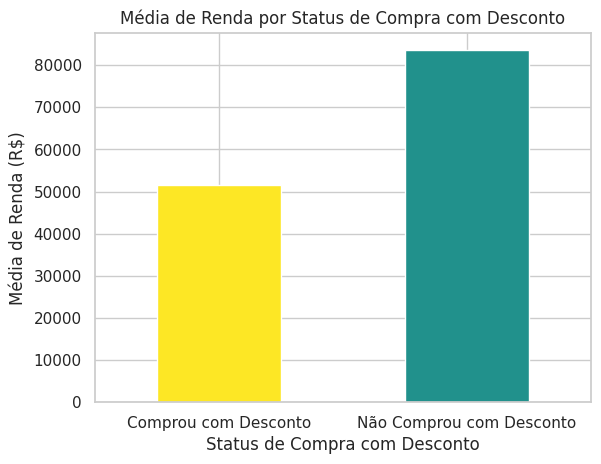

In [ ]:
# Categorizar clientes com base em compras com desconto
data_cleaned['Compra_Desconto'] = data_cleaned['Num_compras_promocao'].apply(lambda x: 'Comprou com Desconto' if x > 0 else 'Não Comprou com Desconto')

# Calculando a média de renda para cada grupo
media_renda = data_cleaned.groupby('Compra_Desconto')['Renda'].mean()

# Plotando o gráfico de barras com a paleta de cores
media_renda.plot(kind='bar', color=colors2)
plt.title('Média de Renda por Status de Compra com Desconto')
plt.xlabel('Status de Compra com Desconto')
plt.ylabel('Média de Renda (R$)')
plt.xticks(rotation=0)
plt.show()

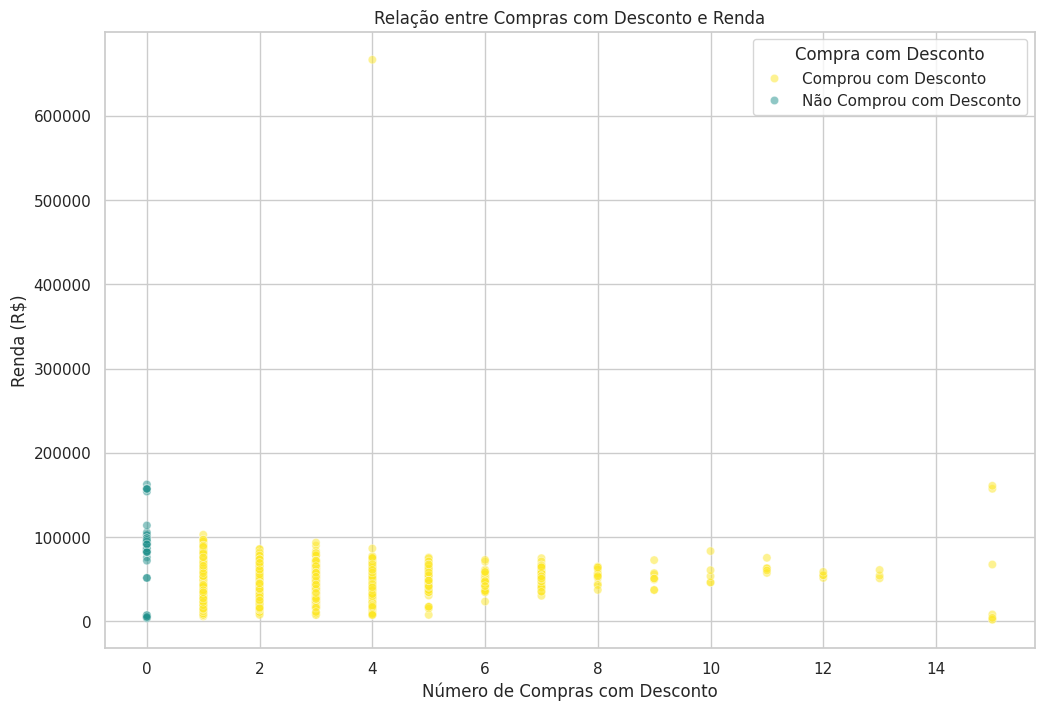

In [ ]:
# Definindo cores para os grupos
colors = {'Comprou com Desconto': colors2[0], 'Não Comprou com Desconto': colors2[1]}

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Num_compras_promocao', y='Renda', data=data_cleaned, hue='Compra_Desconto', palette=colors, alpha=0.5)
plt.title('Relação entre Compras com Desconto e Renda')
plt.xlabel('Número de Compras com Desconto')
plt.ylabel('Renda (R$)')
plt.legend(title='Compra com Desconto')
plt.show()


In [ ]:
data_cleaned.drop(columns = [ 'Status_Filhos', 'Compra_Desconto', 'Response'], inplace = True)
data_cleaned.head(2)

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Pos_Graduacao,Solteiro,Casal,Ex_Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,60


In [ ]:
data_cleaned.drop(columns = ['Pos_Graduacao', 'Ex_Casal'], inplace = True)
data_cleaned.head(2)

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0.0,0.0,1.0,1.0,0.0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0.0,0.0,1.0,1.0,0.0,0,60


In [ ]:
data_cleaned['Reclamou'].value_counts()

Reclamou
0    2217
1      20
Name: count, dtype: int64

In [ ]:
quali = ['Reclamou','Aceitou_alguma_campanha', 'Educ_Basica', 'Ensino_Superior','Casal','Solteiro']

In [ ]:
data_cleaned[quali] = data_cleaned[quali].astype(int)

In [ ]:
data_cleaned

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1,1,0,2,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,1,1,0,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,1,0,1,1,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,1,0,1,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,1,0,1,1,47
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,1,0,0,0,1,0,68
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,1,0,0,0,33
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,1,0,58


### Clusterização

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_cleaned)
scaled_data

array([[0.08483222, 0.        , 0.        , ..., 0.        , 1.        ,
        0.69642857],
       [0.06709518, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.75      ],
       [0.10509733, 0.        , 0.        , ..., 1.        , 0.5       ,
        0.55357143],
       ...,
       [0.08309221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.26785714],
       [0.10153609, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.71428571],
       [0.07690815, 0.5       , 0.5       , ..., 1.        , 1.        ,
        0.75      ]])

### Inercias

In [ ]:
def calc_inercias(X, lista_k, plot=True):
    lista_inercias = []

    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])

    for k in lista_k:
        kmeans = KMeans(n_clusters = k, random_state=42)
        kmeans.fit(X)

        labels_clusters = kmeans.labels_

        #calculo da inercia
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)

        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)

        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {inercia}")

            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()

    return lista_inercias

In [ ]:
lista_k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lista_inercias = calc_inercias(scaled_data, lista_k, plot=False)

In [ ]:
lista_inercias

[2941.1658782715513,
 2539.1707378289343,
 2305.485665133804,
 2159.8929437087213,
 2060.798845109761,
 1901.2033634711001,
 1817.508346865769,
 1727.91525997924,
 1661.3876809024678,
 1601.5923442315295,
 1588.7415744749242,
 1522.7422122613857,
 1483.0064710376973,
 1453.1210693286798]

### Cotovelo

In [ ]:
def plot_cotovelo(lista_k, lista_inercias):
    plt.figure(figsize =(8, 5))

    plt.title('Metodo do cotovelo')
    plt.plot(lista_k, lista_inercias, marker='o')

    plt.xlabel('k')
    plt.ylabel('Inércia (WCSS)')

    plt.show()

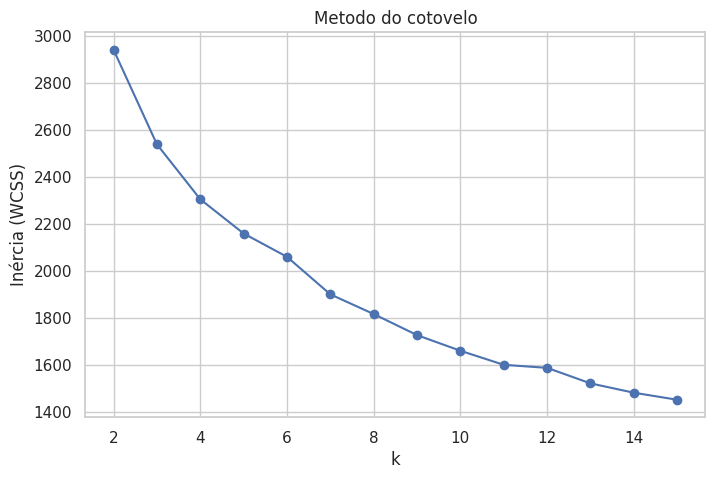

In [ ]:
plot_cotovelo(lista_k, lista_inercias)

### Silhueta

In [ ]:
from sklearn.metrics import silhouette_score

def calc_silhueta(X, lista_k, plot = True):

    lista_silhuetas = []

    X_df = pd.DataFrame(X, columns = [f"X{i+1}" for i in range(X.shape[1])])

    for k in lista_k:
        kmeans = KMeans(n_clusters = k, random_state=42)
        kmeans.fit(X)

        labels_clusters = kmeans.labels_

        #calculo da inercia
        silhueta = silhouette_score(X_df, labels_clusters)
        lista_silhuetas.append(silhueta)

        labels_series = pd.Series(labels_clusters, name = 'label')
        df_result = pd.concat([X_df, labels_series], axis = 1)

        if plot and X.shape[1] == 2:
            print(f"\nInércia para clusterização com k = {k}: {silhueta}")

            sns.jointplot(data = df_result,
                         x = 'X1',
                         y = 'X2',
                         hue = 'label')
            plt.show()

    return lista_silhuetas

In [ ]:
def plot_silhueta(X, lista_k):

    lista_silhuetas = calc_silhueta(X, lista_k, plot = False)

    plt.figure(figsize =(8, 5))

    plt.title("Método da silhueta")

    plt.plot(lista_k, lista_silhuetas, marker='o')

    plt.xlabel("k (# de clusters)")
    plt.ylabel("mean silhouette score")

    plt.show()

In [ ]:
lista_silhuetas = calc_silhueta(scaled_data, range(2, 10), plot=True)

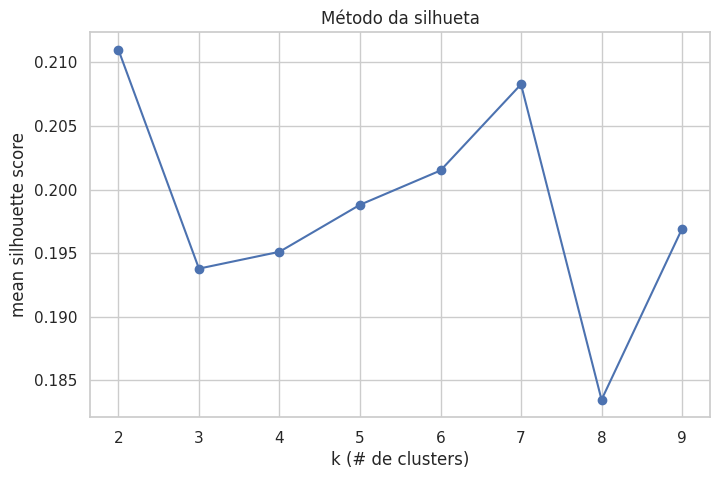

In [ ]:
plot_silhueta(scaled_data, list(range(2, 10)))

In [ ]:
estimador = KMeans(n_clusters = 4, random_state = 42)
modelo = estimador.fit(scaled_data)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def cluster_metrics(labels , df_scaled):
  silhouette = silhouette_score(df_scaled, labels)
  db_index = davies_bouldin_score(df_scaled, labels)
  ch_index = calinski_harabasz_score(df_scaled, labels)

  print(f'Silhouette Score: {silhouette:.2f}')
  print(f'Davies-Bouldin Index: {db_index:.2f}')
  print(f'Calinski-Harabasz Index: {ch_index:.2f}')

In [ ]:
cluster_metrics(modelo.labels_, scaled_data)

Silhouette Score: 0.20
Davies-Bouldin Index: 1.82
Calinski-Harabasz Index: 343.22


In [ ]:
modelo.predict(scaled_data)
data_cleaned['cluster'] = modelo.labels_

In [ ]:
data_cleaned.head()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1,1,0,2,57,2
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,1,1,0,0,60,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,1,0,1,1,49,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,1,0,1,0,30,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,1,0,33,1


In [ ]:
data_cleaned.describe()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,52227.316495,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.008941,0.206527,0.113992,0.503800,0.217255,0.645060,0.972284,45.098346,1.675905
std,25043.269927,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.094152,0.404903,0.317873,0.500097,0.412470,0.478602,0.684704,11.701917,1.078749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,1.000000
50%,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,44.000000,2.000000
75%,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,55.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,74.000000,3.000000


In [ ]:
#Cluster 0
df0 = data_cleaned[data_cleaned['cluster'] == 0]
df0.describe()
# Grupo Formado na sua maioria por casais com uma media 0,5 crianças e 0,5 adolescentes em casa, uma idade média de 44 anos, todos com ensino superior, não aceitaram nenhuma campanha

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0,362.0,362.000000,362.000000,362.0,362.000000,362.000000,362.000000,362.0
mean,65274.701657,0.232044,0.428177,49.831492,615.574586,36.806630,284.143646,56.574586,39.814917,65.168508,2.055249,5.303867,4.497238,7.049724,4.754144,0.0,1.0,0.102210,0.494475,0.0,0.820442,0.941989,46.798343,0.0
std,19510.495390,0.435630,0.538369,29.263855,398.638780,46.583927,269.913100,66.934716,49.377639,62.117901,1.762093,2.648668,2.874329,3.242338,2.522540,0.0,0.0,0.303343,0.500661,0.0,0.384350,0.705699,12.111472,0.0
min,5648.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.000000,18.000000,0.0
25%,51606.000000,0.000000,0.000000,25.000000,307.500000,2.250000,53.000000,3.000000,1.000000,21.000000,1.000000,3.000000,2.000000,5.000000,2.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,0.000000,38.000000,0.0
50%,70030.000000,0.000000,0.000000,52.000000,589.000000,19.000000,205.000000,29.000000,21.000000,39.500000,1.000000,5.000000,4.000000,7.000000,5.000000,0.0,1.0,0.000000,0.000000,0.0,1.000000,1.000000,45.500000,0.0
75%,80397.250000,0.000000,1.000000,73.000000,938.000000,50.750000,452.250000,94.750000,56.500000,94.500000,3.000000,7.000000,7.000000,10.000000,7.000000,0.0,1.0,0.000000,1.000000,0.0,1.000000,1.000000,57.000000,0.0
max,105471.000000,2.000000,2.000000,99.000000,1493.000000,185.000000,1607.000000,253.000000,194.000000,242.000000,11.000000,11.000000,11.000000,13.000000,20.000000,0.0,1.0,1.000000,1.000000,0.0,1.000000,2.000000,73.000000,0.0


In [ ]:
df1 = data_cleaned[data_cleaned['cluster'] == 1]
df1.describe()

#Caracteristicas principais: Aceitou_alguma_campanha e fez pelo menos 1 compra em loja fisica
#Grupo formado por solteiros que possuem uma média baixa de filhos, idade de 45 anos, aceitaram pelo menos 1 campanha

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.000000,695.0,695.000000,695.0,695.0,695.000000,695.000000,695.000000,695.0
mean,49206.532374,0.471942,0.571223,48.353957,249.430216,20.617266,124.096403,29.728058,19.571223,33.732374,2.474820,3.797122,2.207194,5.509353,5.425899,0.004317,0.0,0.235971,0.0,0.0,0.827338,0.952518,46.456115,1.0
std,20962.003664,0.535757,0.550379,28.978600,294.590196,34.133325,189.106570,47.650559,33.475059,42.849112,2.144395,2.547642,2.750992,3.131528,2.336878,0.065606,0.0,0.424910,0.0,0.0,0.378227,0.678438,11.304561,0.0
min,4023.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.000000,1.0
25%,34142.500000,0.000000,0.000000,23.000000,21.000000,1.000000,13.000000,2.000000,1.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,38.000000,1.0
50%,49269.000000,0.000000,1.000000,49.000000,113.000000,6.000000,46.000000,10.000000,6.000000,16.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,1.000000,45.000000,1.0
75%,63848.000000,1.000000,1.000000,73.000000,398.000000,23.000000,146.500000,34.000000,20.000000,43.000000,3.000000,5.500000,3.000000,8.000000,7.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,1.000000,55.500000,1.0
max,162397.000000,2.000000,2.000000,99.000000,1396.000000,197.000000,1622.000000,259.000000,194.000000,232.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,2.000000,71.000000,1.0


In [ ]:
df2 = data_cleaned[data_cleaned['cluster'] == 2]
df2.describe()

#Caracteristicas principais: Aceitou_alguma_campanha e fez pelo menos 1 compra em loja fisica
#grupo misto em relacionamentos, apenas 1/4 possui filhos, não aceitaram nenhuma campanha

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.0,486.0,486.000000,486.000000,486.0
mean,51016.351852,0.465021,0.407407,49.265432,288.683128,26.888889,181.504115,38.639918,27.106996,44.364198,2.154321,3.897119,2.606996,5.641975,5.288066,0.012346,0.205761,0.111111,0.522634,1.0,0.0,0.969136,42.318930,2.0
std,21956.296844,0.542817,0.532129,28.646180,331.587923,40.465131,242.594734,55.831336,41.739754,52.767972,1.768817,2.958425,2.788761,3.236297,2.564496,0.110537,0.404673,0.314594,0.500002,0.0,0.0,0.692429,12.379028,0.0
min,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,19.000000,2.0
25%,33996.000000,0.000000,0.000000,26.000000,20.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,32.000000,2.0
50%,49128.000000,0.000000,0.000000,50.000000,155.000000,8.500000,64.000000,12.000000,9.000000,26.000000,2.000000,3.000000,1.500000,4.500000,6.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,42.000000,2.0
75%,68558.250000,1.000000,1.000000,74.000000,479.750000,32.750000,259.750000,53.500000,36.000000,52.000000,3.000000,5.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,51.750000,2.0
max,113734.000000,2.000000,2.000000,99.000000,1332.000000,199.000000,984.000000,250.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,2.000000,74.000000,2.0


In [ ]:
df3 = data_cleaned[data_cleaned['cluster'] == 3]
df3.describe()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.0,694.0,694.0,694.0,694.000000,694.000000,694.000000,694.0
mean,49294.780980,0.512968,0.551873,49.364553,206.838617,26.002882,138.436599,34.609510,27.902017,42.884726,2.440922,3.876081,2.200288,5.531700,5.528818,0.015850,0.0,0.0,1.0,0.0,0.822767,1.010086,44.798271,3.0
std,30661.777985,0.560075,0.536722,29.034606,235.703178,39.444702,198.431020,50.830607,41.813462,51.031592,1.883734,2.778329,2.840432,3.237765,2.320908,0.124986,0.0,0.0,0.0,0.0,0.382142,0.674124,11.014732,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,20.000000,3.0
25%,33194.250000,0.000000,0.000000,25.000000,17.250000,2.000000,14.000000,3.000000,2.000000,7.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,37.000000,3.0
50%,46832.500000,0.000000,1.000000,49.000000,110.000000,7.000000,56.500000,11.000000,8.000000,22.000000,2.000000,3.000000,1.000000,4.000000,6.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,43.000000,3.0
75%,64589.250000,1.000000,1.000000,75.000000,343.500000,33.000000,188.000000,42.000000,33.000000,54.000000,3.000000,5.750000,3.000000,8.000000,7.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,54.000000,3.0
max,666666.000000,2.000000,2.000000,99.000000,1132.000000,193.000000,1725.000000,254.000000,197.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,0.0,0.0,1.0,0.0,1.000000,2.000000,70.000000,3.0


In [ ]:
#df4 = data_cleaned[data_cleaned['cluster'] == 4]
#df4.describe()

In [ ]:
X_shc = data_cleaned.loc[:, ['Ensino_Superior', 'Solteiro']].values
X_shc

array([[1, 1],
       [1, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 0]])

In [ ]:
# import scipy.cluster.hierarchy as sch
# import matplotlib.pyplot as plt

# plt.figure(figsize=(16, 6))
# dendrogram = sch.dendrogram(sch.linkage(X_shc, method = 'ward'), leaf_rotation=90, leaf_font_size=4)
# plt.title('Dendrogram')
# plt.xlabel('Customers')
# plt.ylabel('Euclidean distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(X_shc)

Text(0, 0.5, 'Num_compras_site')

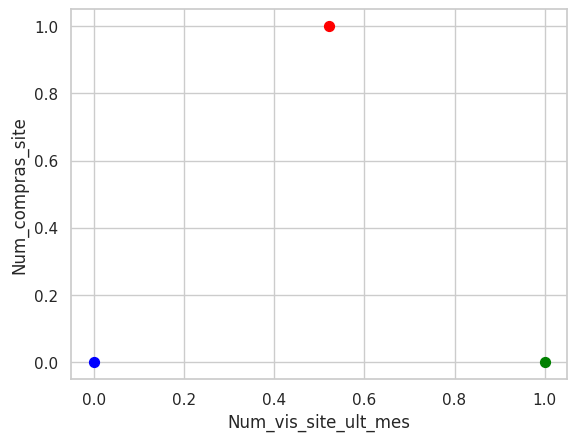

In [ ]:
import numpy as np
plt.scatter(np.mean(X_shc[y_hc == 0, 0]), np.mean(X_shc[y_hc == 0, 1]), s = 50 , c = 'red')
plt.scatter(np.mean(X_shc[y_hc == 1, 0]), np.mean(X_shc[y_hc == 1, 1]), s = 50 , c = 'blue')
plt.scatter(np.mean(X_shc[y_hc == 2, 0]), np.mean(X_shc[y_hc == 2, 1]), s = 50 , c = 'green')
plt.scatter(np.mean(X_shc[y_hc == 3, 0]), np.mean(X_shc[y_hc == 3, 1]), s = 50 , c = 'cyan')
plt.scatter(np.mean(X_shc[y_hc == 4, 0]), np.mean(X_shc[y_hc == 4, 1]), s = 50 , c = 'magenta')
plt.scatter(np.mean(X_shc[y_hc == 5, 0]), np.mean(X_shc[y_hc == 5, 1]), s = 50 , c = 'gray')

plt.xlabel('Num_vis_site_ult_mes')
plt.ylabel('Num_compras_site')

In [ ]:
def HereditaryClusterer(n_clusters1, linkage1):
    data = X_shc.copy()
    hc = AgglomerativeClustering(n_clusters = n_clusters1, linkage = linkage1)
    y_hc = hc.fit_predict(data)
    import numpy as np
    plt.scatter(np.mean(data[y_hc == 0, 0]), np.mean(data[y_hc == 0, 1]), s = 50 , c = 'red')
    plt.scatter(np.mean(data[y_hc == 1, 0]), np.mean(data[y_hc == 1, 1]), s = 50 , c = 'blue')
    plt.scatter(np.mean(data[y_hc == 2, 0]), np.mean(data[y_hc == 2, 1]), s = 50 , c = 'green')
    plt.scatter(np.mean(data[y_hc == 3, 0]), np.mean(data[y_hc == 3, 1]), s = 50 , c = 'cyan')
    plt.scatter(np.mean(data[y_hc == 4, 0]), np.mean(data[y_hc == 4, 1]), s = 50 , c = 'magenta')
    plt.xlabel('Num_vis_site_ult_mes')
    plt.ylabel('Num_compras_site')

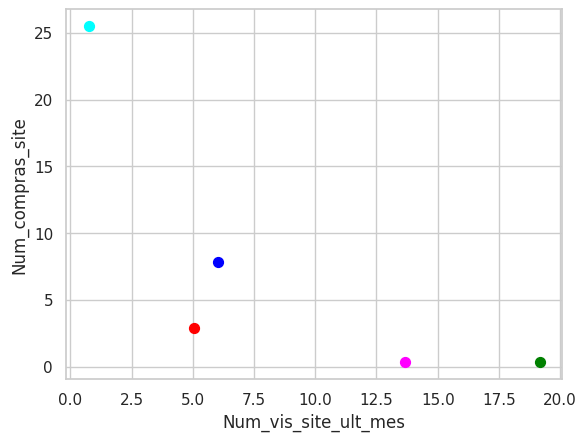

In [ ]:
HereditaryClusterer(5, 'average')

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
df_components = pd.DataFrame(pca.transform(scaled_data), columns= ['PCA_1', 'PCA_2'])

In [ ]:
df_components

,PCA_1,PCA_2
0,1.061238,-0.546495
1,1.002477,-0.210666
2,-0.350090,-0.601649
3,-0.361565,-0.366170
4,-0.439015,0.427915
...,...,...
2232,-0.363903,-0.604303
2233,-0.481685,0.411141
2234,0.434547,-0.670853
2235,-0.464007,0.325655


<Axes: xlabel='PCA_1', ylabel='PCA_2'>

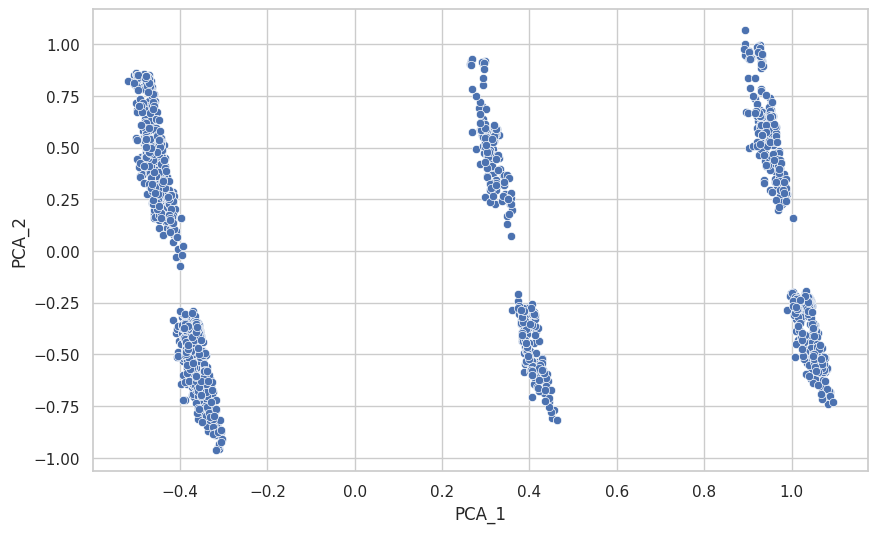

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_components,
               x = 'PCA_1',
               y = 'PCA_2')

In [ ]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_components)

In [ ]:
df5 = data_cleaned

In [ ]:
df5.loc[:,'cluster'] = y_hc

<Axes: xlabel='Renda', ylabel='Gasto_vinhos'>

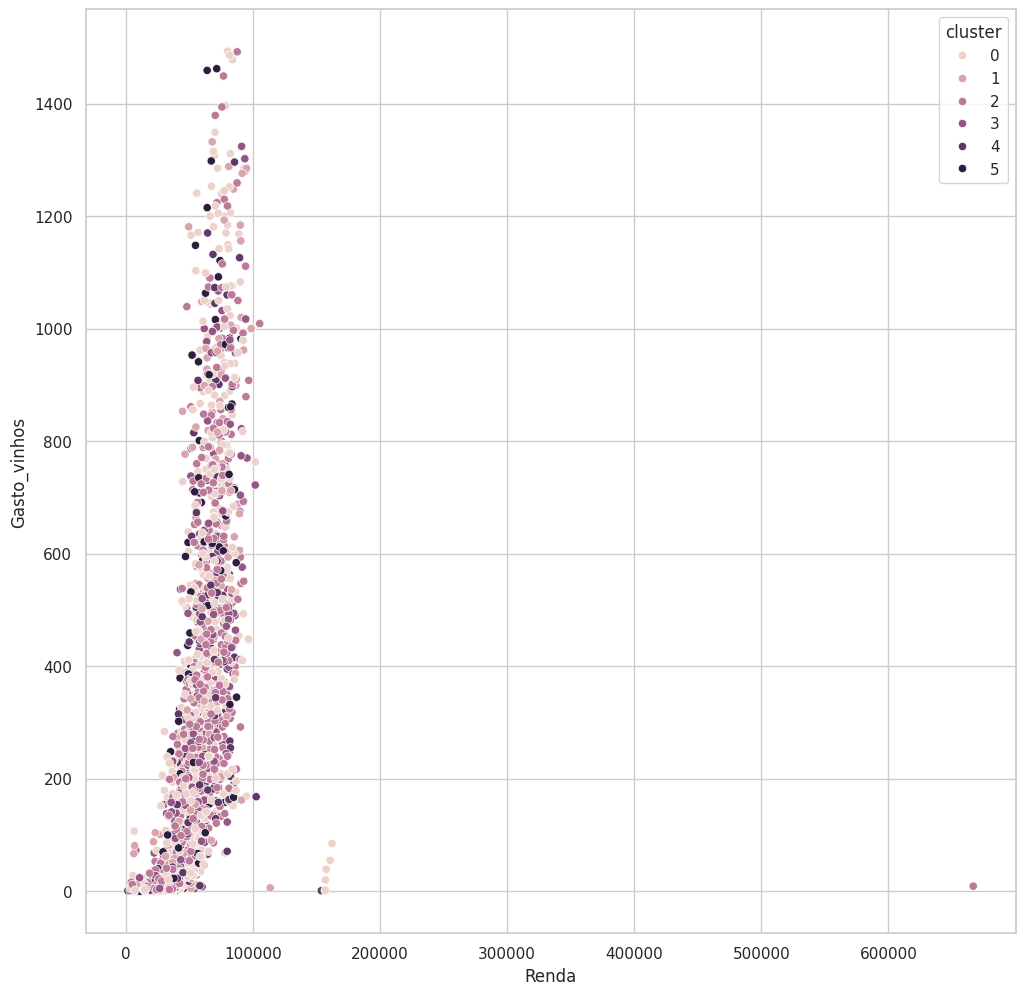

In [ ]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = df5,
                x = 'Renda',
                y = 'Gasto_vinhos',
                hue = 'cluster')

In [ ]:
df5.describe()

,Renda,Num_criancas,Num_adolesc,Dias_desde_ult_compr,Gasto_vinhos,Gasto_frutas,Gasto_carnes,Gasto_peixe,Gasto_doces,Gasto_luxo,Num_compras_promocao,Num_compras_site,Num_compras_catalogo,Num_compras_loja,Num_vis_site_ult_mes,Reclamou,Aceitou_alguma_campanha,Educ_Basica,Ensino_Superior,Solteiro,Casal,Fidelizacao_anos,Idade,cluster
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,52227.316495,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.008941,0.206527,0.113992,0.503800,0.217255,0.645060,0.972284,45.098346,1.706750
std,25043.269927,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.094152,0.404903,0.317873,0.500097,0.412470,0.478602,0.684704,11.701917,1.523758
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000,0.000000
50%,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,44.000000,2.000000
75%,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,55.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,74.000000,5.000000


<BarContainer object of 23 artists>

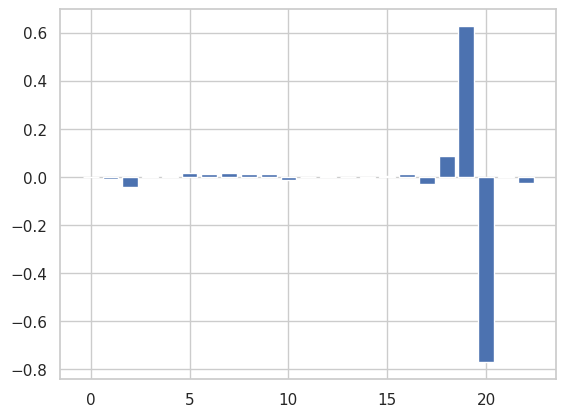

In [ ]:
plt.bar(range(0, len(pca.components_[0])), pca.components_[0])

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def cluster_metrics(labels , df_scaled):
  silhouette = silhouette_score(df_scaled, labels)
  db_index = davies_bouldin_score(df_scaled, labels)
  ch_index = calinski_harabasz_score(df_scaled, labels)

  print(f'Silhouette Score: {silhouette:.2f}')
  print(f'Davies-Bouldin Index: {db_index:.2f}')
  print(f'Calinski-Harabasz Index: {ch_index:.2f}')